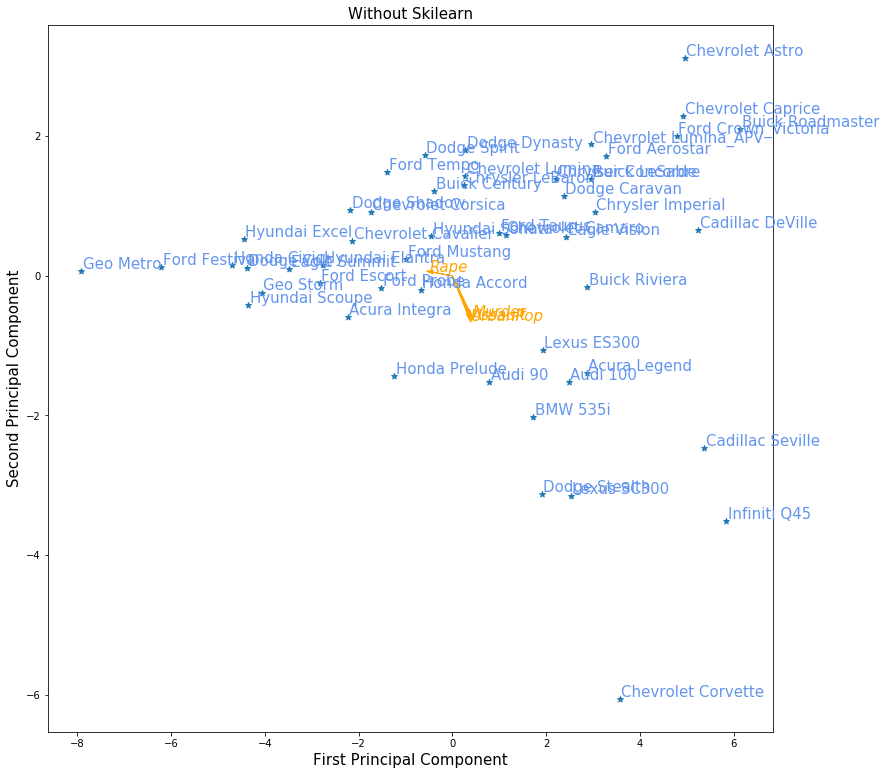

"\nscaler = sklearn.preprocessing.StandardScaler()\nscaler.fit(X)\nX_scaled = scaler.transform(X)\n\npca = PCA(n_components = 4)\nX_pca = pca.fit_transform(X_scaled)\n\nvec = np.transpose(pca.components_[0:2,:])\n\nplt.figure(figsize = (13,13))\nplt.scatter(X_pca[:,0],X_pca[:,1], marker='*')\nfor x, y, text in zip(X_pca[:,0], X_pca[:,1], cities):\n    plt.text(x + 0.03, y + 0.03, text, color = 'cornflowerblue', fontsize = 15)\nfor i in range(4):\n    plt.arrow(0, 0, vec[i,0] * 2.1, vec[i,1] * 2.1, color = 'orange',head_width=0.05, head_length=0.15)\n    plt.text(vec[i,0] * 3.1, vec[i,1] * 3.1, columns[i], fontsize=15, color='orange', style = 'italic')\nplt.xlabel('First Principal Component',fontsize = 15)\nplt.ylabel('Second Principal Component',fontsize = 15)\nplt.ylim(-3, 3)\nplt.title('With Skilearn', fontsize = 15)\nplt.show()\n\n#plt.figure(figsize = (10, 7))\n#plt.plot(np.cumsum(pca.explained_variance_ratio_))\n#plt.xlabel('Number of components', fontsize = 15)\n#plt.ylabel('Cumu

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import sklearn.preprocessing

#data = pd.read_csv('Datos/USArrests.csv')
data = pd.read_csv('Datos/Cars93.csv')
data = data.fillna(0)
#columns = ['Murder', 'Assault', 'UrbanPop', 'Rape']
#cities = data['Unnamed: 0']
names = [27]
ii = [4,5,6,7,8,12,13,14,15,17,18,19,20,21,22,23,24,25]
X = np.array(data[data.keys()[ii]])
cars = data[data.keys()[27]]
#print(X)
for i in range(len(ii)):
    X[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])

S = np.zeros(len(ii))
for i in X:
    S = S + np.outer(i,i)
S = (1/(len(X))) * S
w, v = np.linalg.eig(S)
vec1 = v[:,np.flipud(np.argsort(w))[0]]
vec2 = - v[:,np.flipud(np.argsort(w))[1]]

pc = np.zeros(50)
sc = np.zeros(50)
for i in range(50):
    pc[i], sc[i] = [vec1 @ X[i,:], vec2 @ X[i,:]]

plt.figure(figsize = (13,13))
plt.scatter(pc, sc, marker='*')
for x, y, text in zip(pc, sc, cars):
    plt.text(x + 0.03, y + 0.03, text, color = 'cornflowerblue', fontsize = 15)
for i in range(4):
    plt.arrow(0, 0, vec1[i] * 1.5, vec2[i] * 1.5, color = 'orange',head_width=0.05, head_length=0.15)
    plt.text(vec1[i] * 1.8, vec2[i] * 1.8, columns[i], fontsize=15, color='orange', style = 'italic')    
plt.xlabel('First Principal Component',fontsize = 15)
plt.ylabel('Second Principal Component',fontsize = 15)
plt.title('Without Skilearn', fontsize = 15)
plt.show()

# Principal component analysis with skilearn
'''
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

pca = PCA(n_components = 4)
X_pca = pca.fit_transform(X_scaled)

vec = np.transpose(pca.components_[0:2,:])

plt.figure(figsize = (13,13))
plt.scatter(X_pca[:,0],X_pca[:,1], marker='*')
for x, y, text in zip(X_pca[:,0], X_pca[:,1], cities):
    plt.text(x + 0.03, y + 0.03, text, color = 'cornflowerblue', fontsize = 15)
for i in range(4):
    plt.arrow(0, 0, vec[i,0] * 2.1, vec[i,1] * 2.1, color = 'orange',head_width=0.05, head_length=0.15)
    plt.text(vec[i,0] * 3.1, vec[i,1] * 3.1, columns[i], fontsize=15, color='orange', style = 'italic')
plt.xlabel('First Principal Component',fontsize = 15)
plt.ylabel('Second Principal Component',fontsize = 15)
plt.ylim(-3, 3)
plt.title('With Skilearn', fontsize = 15)
plt.show()

#plt.figure(figsize = (10, 7))
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('Number of components', fontsize = 15)
#plt.ylabel('Cumulative explained variance', fontsize = 15)
#plt.show()
'''